In [1]:
import pandas as pd

In [2]:
#training data
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Displaying summary statistics
summary_stats = train_data.describe()
summary_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
missing_values = train_data.isnull().sum()

print("Missing Values: \n", missing_values)

Missing Values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


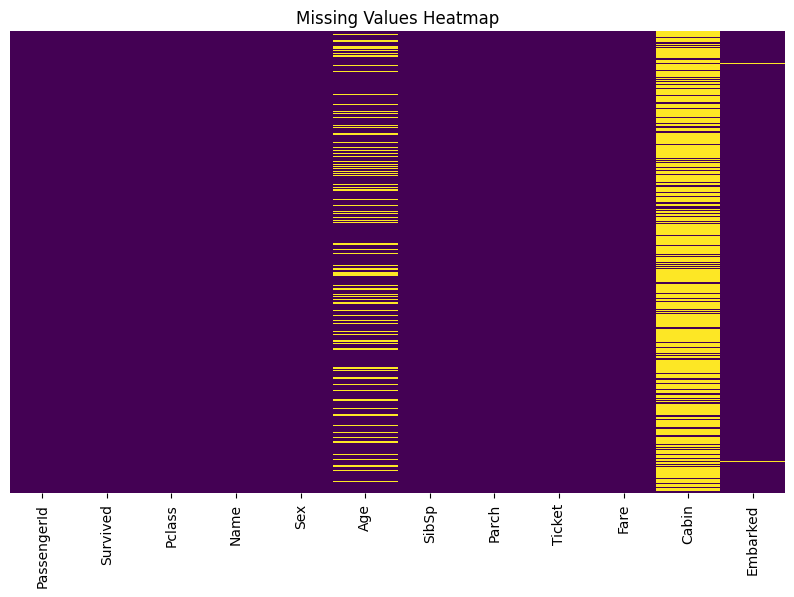

In [9]:
#Visualize missing Values
plt.figure(figsize=(10 , 6))
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# Handling Missing Values

#1. Age:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

#2. Cabin:
train_data.drop('Cabin', axis=1, inplace=True)

#3.Embarked:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(most_common_embarked, inplace=True)

#Verifying if the missing values are handled
missing_values_after_handling = train_data.isnull().sum()
print("Missing Values after Handling:\n", missing_values_after_handling)

Missing Values after Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\pg563\AppData\Local\Temp\ipykernel_6880\1338393891.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\pg563\AppData\Local\Temp\ipykernel_6880\1338393891.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [11]:
# Calculating the percentage of people who has survived
survival_percentage = (train_data['Survived'].sum() / len(train_data)) * 100

# Printing the result
print(f"Percentage of people who has survived: {survival_percentage:.2f}%")

Percentage of people who has survived: 38.38%


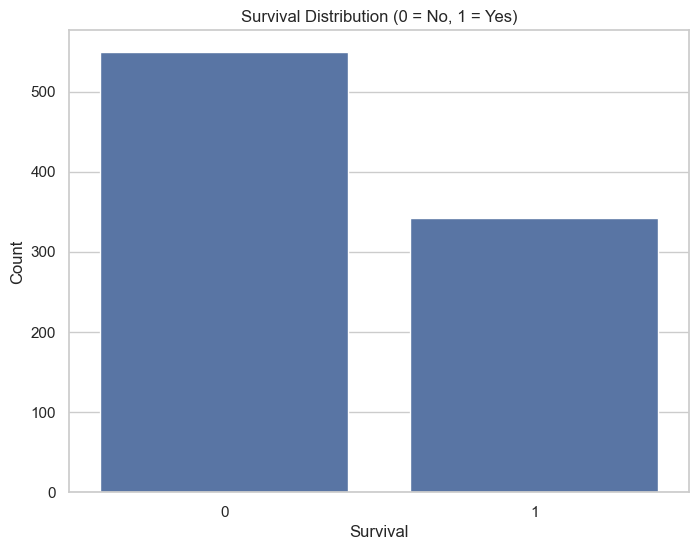

In [13]:
# Set the styles for plots
sns.set(style="whitegrid")

# Visualizing survival rate
plt.figure(figsize=(8 , 6))
sns.countplot(x= 'Survived', data=train_data)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

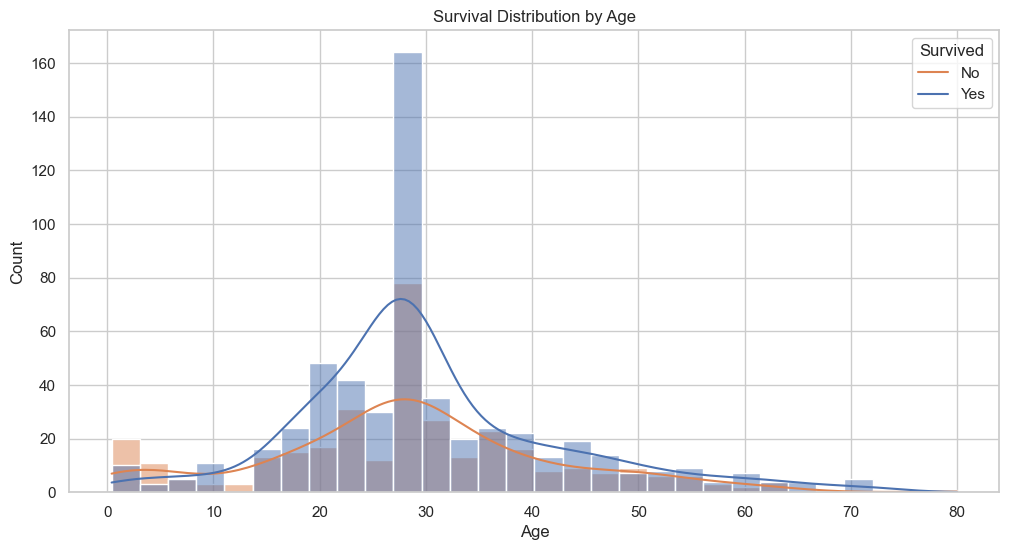

In [14]:
# Visualizing survival rate by age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True) # used kernel density estimation
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

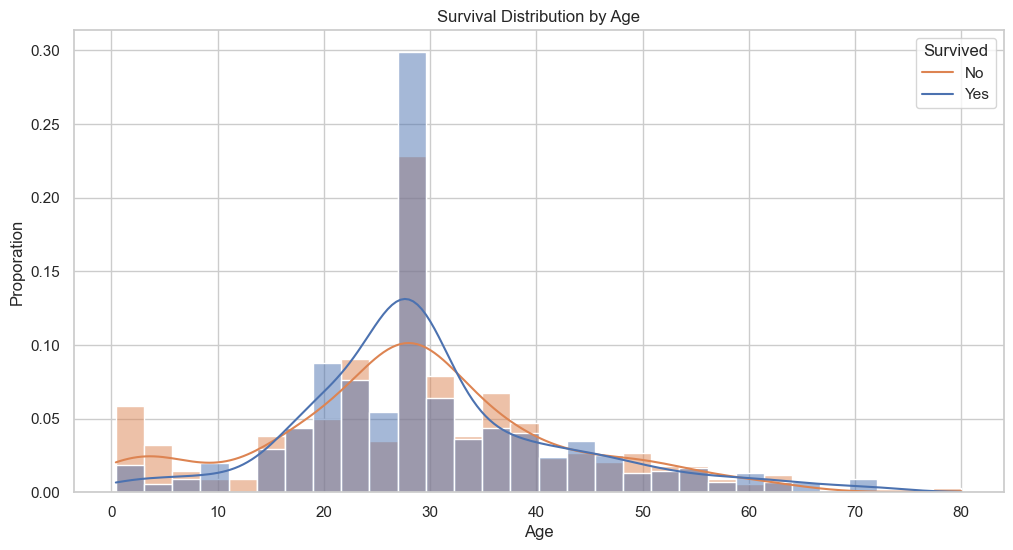

In [16]:
# Visualizing survival rate by age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True, stat='probability', common_norm=False)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Proporation')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

C:\Users\pg563\AppData\Local\Temp\ipykernel_6880\218886307.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_data, ci=None)


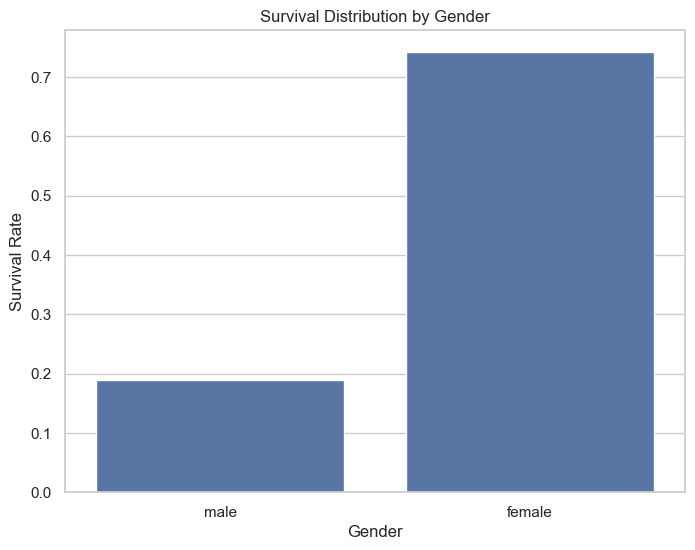

In [17]:
# Visualizing survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, ci=None)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

In [18]:
train_data_copy = train_data.copy()

train_data_copy['Survived'] = train_data_copy['Survived'].astype(str)

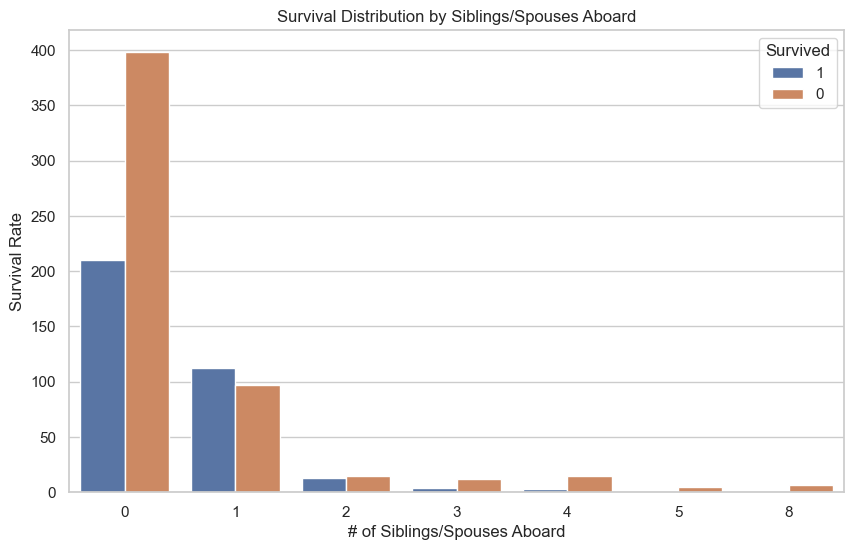

In [19]:
# Visualizing survival rate by number of siblings/spouses
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Siblings/Spouses Aboard')
plt.xlabel('# of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

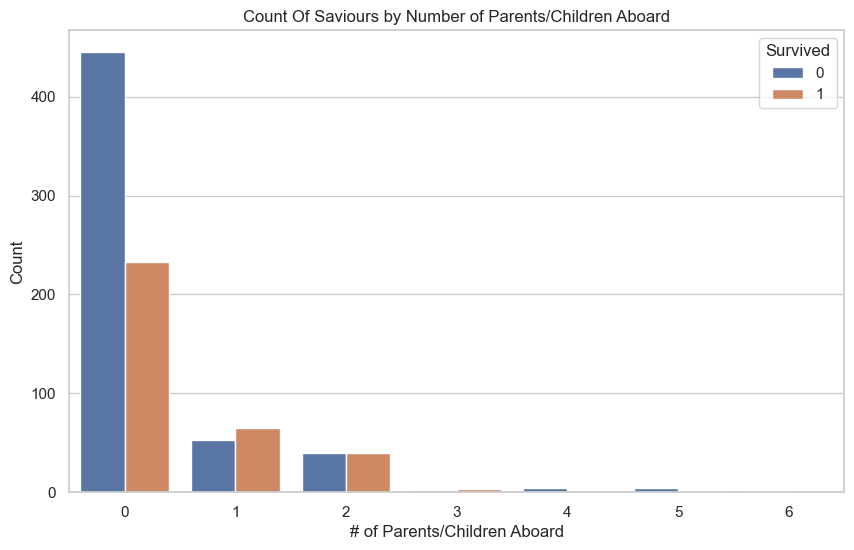

In [20]:
# Exploring Demographics Characteristics
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=train_data_copy)
plt.title('Count Of Saviours by Number of Parents/Children Aboard')
plt.xlabel('# of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

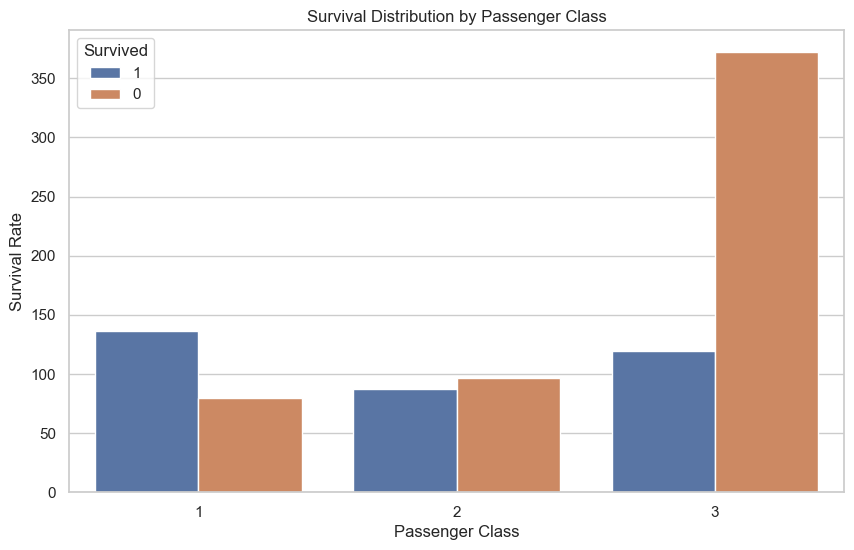

In [21]:
# Visualizing survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data_copy)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

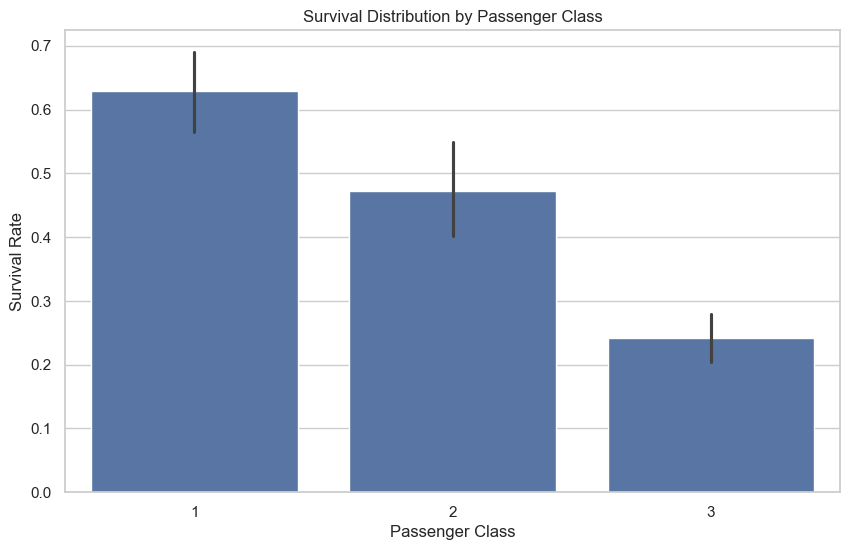

In [22]:
# Convert 'Survived' column to numeric
train_data['Survived']= train_data['Survived'].astype(int)

# Visualizing survival rate (proportion) by passenger class 
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [23]:
# Calculating average fare for surviours and non-surviours
average_fare = train_data.groupby('Survived')['Fare'].mean()

#Displaying the results
print("Average Fare for Non-Surviours:" , average_fare[0])
print("Average Fare for Surviours:" , average_fare[1])

Average Fare for Non-Surviours: 22.117886885245902
Average Fare for Surviours: 48.39540760233918


In [24]:
# Create a cross-tabulation of Embarked and Survived
embarked_survival = pd.crosstab(train_data['Embarked'], train_data['Survived'], margins=True, margins_name='Total')

# Plot the cross-tabulation
embarked_survival

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
Total,549,342,891


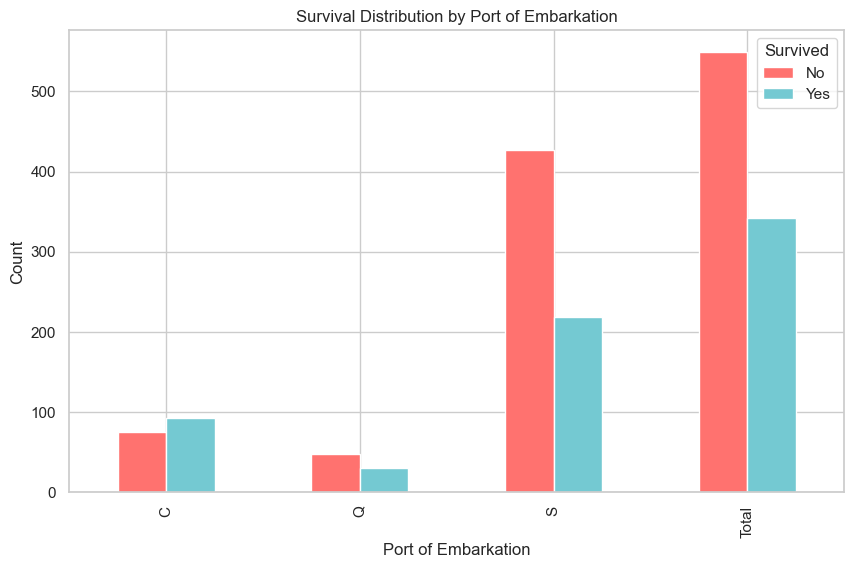

In [25]:
embarked_survival.drop('Total', axis=1, inplace=True)

# Plot a grouped bar plot
embarked_survival.plot(kind='bar', color=['#FF726F', '#74C9D2'], figsize=(10, 6))
plt.title('Survival Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [26]:
# Calculating survival rate (percentage) for each combination of "Embarked" and "Survived"
embarked_survival_rate = pd.crosstab(index=train_data['Embarked'], columns=train_data['Survived'], normalize='index') * 100

# Display the table
embarked_survival_rate

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.099071,33.900929


In [27]:
# Load test data
test_data = pd.read_csv('test.csv')

In [28]:
train_data = train_data.drop(['Name'], axis=1)


In [29]:
train_data = train_data.drop(['PassengerId', 'Ticket'], axis=1)